# Consuming APIs that require keys

Federal Reserve Bank

Source: https://fred.stlouisfed.org/

Now, we need a key to consume the API. To do this, we need to create an account on the website and generate a key. The key is a code that identifies the user and allows access to the API. This is a very common scenario, as many APIs are paid and require a key to be consumed. In this case, the API is free and the key is generated automatically.

>  "This product uses the FRED® API but is not endorsed or certified by the Federal Reserve Bank of St. Louis."

## Using environment variables to store the key

A common problem is that when sharing code, the key becomes exposed. One solution is to store the key in an environment variable. Environment variables are variables that are stored in the operating system and can be accessed by any program.

To avoid exposing the key in the code, we will store it in an environment variable. To do this, we will use the `python-dotenv` library. To install, simply run the command below in the terminal:

```bash
pip install python-dotenv
```

Now, let's create a `.env` file in the root of the project and add the API key:

```bash
FRED_API_KEY=1234567890
```

To read the environment variable, we will use the `os` library:

```python
from dotenv import load_dotenv
import os

load_dotenv()

key = os.getenv("FRED_API_KEY")
```


In [ ]:
pip install python-dotenv

In [1]:
from dotenv import load_dotenv
import os

#we must change the path because Anaconda online does not allows us to use the name ".env"
load_dotenv(dotenv_path='FRED_API_KEY_FILE.env')

key = os.getenv("FRED_API_KEY")


## Endpoint series/search

In [2]:
BUSCA_BR = "brazil"

URL_BRASIL_BUSCA = f"https://api.stlouisfed.org/fred/series/search?search_text={BUSCA_BR}&api_key={key}&file_type=json"


In [3]:
#access the API URL
import requests

resposta_br_busca = requests.get(URL_BRASIL_BUSCA)

#chech the response
resposta_br_busca.status_code

200

In [4]:
#check response header
resposta_br_busca.headers


{'Content-Type': 'application/json; charset=UTF-8', 'Server': 'Apache', 'Last-Modified': 'Wed, 04 Jun 2025 18:15:28 GMT', 'Content-Encoding': 'gzip', 'Content-Length': '88473', 'Expires': 'Wed, 04 Jun 2025 18:15:28 GMT', 'Cache-Control': 'max-age=0, no-cache', 'Pragma': 'no-cache', 'Date': 'Wed, 04 Jun 2025 18:15:28 GMT', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Alt-Svc': 'h3=":443"; ma=93600', 'Strict-Transport-Security': 'max-age=86400'}

In [5]:
#check if the reponse is a JSON with 200 code returned that says everything is fine!
resposta_br_busca.json

<bound method Response.json of <Response [200]>>

In [6]:
#check the API JSON counter
resposta_br_busca.json()["count"]

1198

In [7]:
#check the first JSON element
resposta_br_busca.json()["seriess"][0]

{'id': 'CPALTT01BRM659N',
 'realtime_start': '2025-06-04',
 'realtime_end': '2025-06-04',
 'title': 'Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for Brazil',
 'observation_start': '1980-12-01',
 'observation_end': '2025-04-01',
 'frequency': 'Monthly',
 'frequency_short': 'M',
 'units': 'Growth rate same period previous year',
 'units_short': 'Growth rate same period previous Yr.',
 'seasonal_adjustment': 'Not Seasonally Adjusted',
 'seasonal_adjustment_short': 'NSA',
 'last_updated': '2025-05-15 14:20:11-05',
 'popularity': 39,
 'group_popularity': 49,
 'notes': 'OECD Data Filters: \nREF_AREA: BRA\nMEASURE: CPI\nUNIT_MEASURE: PA\nMETHODOLOGY: N\nEXPENDITURE: _T\nADJUSTMENT: N\nTRANSFORMATION: GY\nFREQ: M\n\nAll OECD data should be cited as follows: OECD (year), (dataset name), (data source) DOI or https://data-explorer.oecd.org/ (https://data-explorer.oecd.org/). (accessed on (date)).'}

In [8]:
#check the last JSON element
resposta_br_busca.json()["seriess"][-1]

{'id': 'LFEM24TTBRQ647N',
 'realtime_start': '2025-06-04',
 'realtime_end': '2025-06-04',
 'title': 'Infra-Annual Labor Statistics: Employment Total: From 15 to 24 Years for Brazil',
 'observation_start': '2002-04-01',
 'observation_end': '2015-07-01',
 'frequency': 'Quarterly',
 'frequency_short': 'Q',
 'units': 'Persons',
 'units_short': 'Persons',
 'seasonal_adjustment': 'Not Seasonally Adjusted',
 'seasonal_adjustment_short': 'NSA',
 'last_updated': '2024-04-10 12:25:38-05',
 'popularity': 0,
 'group_popularity': 1,
 'notes': 'OECD Data Filters: \nREF_AREA: BRA\nMEASURE: EMP\nUNIT_MEASURE: PS\nTRANSFORMATION: _Z\nADJUSTMENT: N\nSEX: _T\nAGE: Y15T24\nACTIVITY: _Z\nFREQ: Q\n\nAll OECD data should be cited as follows: OECD (year), (dataset name), (data source) DOI or https://data-explorer.oecd.org/ (https://data-explorer.oecd.org/). (accessed on (date)).'}

In [9]:
#checks what the returned type is
type(resposta_br_busca.json())

dict

In [10]:
#SECURITY BREACH: show the URL. **NOTE: the API_KEY is not hidden. It was deleted, just to show the security breach
URL_BRASIL_BUSCA

'https://api.stlouisfed.org/fred/series/search?search_text=brazil&api_key=d0ecf483d8836f59c4a9347c3943caea&file_type=json'

### pagination

In [11]:
# limiting pagination to 3 results
LIMIT = 3

URL_BRASIL_BUSCA_LIMIT = f"https://api.stlouisfed.org/fred/series/search?search_text={BUSCA_BR}&api_key={key}&file_type=json&limit={LIMIT}"

requests.get(URL_BRASIL_BUSCA_LIMIT).json()

{'realtime_start': '2025-06-04',
 'realtime_end': '2025-06-04',
 'order_by': 'search_rank',
 'sort_order': 'desc',
 'count': 1198,
 'offset': 0,
 'limit': 3,
 'seriess': [{'id': 'CPALTT01BRM659N',
   'realtime_start': '2025-06-04',
   'realtime_end': '2025-06-04',
   'title': 'Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for Brazil',
   'observation_start': '1980-12-01',
   'observation_end': '2025-04-01',
   'frequency': 'Monthly',
   'frequency_short': 'M',
   'units': 'Growth rate same period previous year',
   'units_short': 'Growth rate same period previous Yr.',
   'seasonal_adjustment': 'Not Seasonally Adjusted',
   'seasonal_adjustment_short': 'NSA',
   'last_updated': '2025-05-15 14:20:11-05',
   'popularity': 39,
   'group_popularity': 49,
   'notes': 'OECD Data Filters: \nREF_AREA: BRA\nMEASURE: CPI\nUNIT_MEASURE: PA\nMETHODOLOGY: N\nEXPENDITURE: _T\nADJUSTMENT: N\nTRANSFORMATION: GY\nFREQ: M\n\nAll OECD data should be cited as follows: OECD

In [12]:
# limiting pagination to 3 results and start using offset to show how to do
LIMIT = 3
OFFSET = 3

URL_BRASIL_BUSCA_LIMIT_OFFSET = f"https://api.stlouisfed.org/fred/series/search?search_text={BUSCA_BR}&api_key={key}&file_type=json&limit={LIMIT}&offset={OFFSET}"

requests.get(URL_BRASIL_BUSCA_LIMIT_OFFSET).json()

{'realtime_start': '2025-06-04',
 'realtime_end': '2025-06-04',
 'order_by': 'search_rank',
 'sort_order': 'desc',
 'count': 1198,
 'offset': 3,
 'limit': 3,
 'seriess': [{'id': 'BRACPALTT01IXNBM',
   'realtime_start': '2025-06-04',
   'realtime_end': '2025-06-04',
   'title': 'Consumer Price Index: All Items: Total for Brazil',
   'observation_start': '1979-12-01',
   'observation_end': '2023-11-01',
   'frequency': 'Monthly',
   'frequency_short': 'M',
   'units': 'Index source base',
   'units_short': 'Index source base',
   'seasonal_adjustment': 'Not Seasonally Adjusted',
   'seasonal_adjustment_short': 'NSA',
   'last_updated': '2024-01-12 14:27:11-06',
   'popularity': 8,
   'group_popularity': 49,
   'notes': 'OECD Descriptor ID: CPALTT01\nOECD unit ID: IDX\nOECD country ID: BRA\n\nAll OECD data should be cited as follows: OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database), https://dx.doi.org/10.1787/data-00052-en (Accessed on date) Copyri

### Passing to a dataframe

In [61]:
# using PANDAS!
import pandas as pd

#show first 5 lines 
df_busca = pd.DataFrame(resposta_br_busca.json()["seriess"])
df_busca.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,CPALTT01BRM659N,2025-06-04,2025-06-04,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1980-12-01,2025-04-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2025-05-15 14:20:11-05,39,49,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
1,BRACPIALLMINMEI,2025-06-04,2025-06-04,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1979-12-01,2025-04-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-05-15 14:20:22-05,22,49,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
2,BRACPIALLAINMEI,2025-06-04,2025-06-04,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1980-01-01,2024-01-01,Annual,A,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-01-15 14:00:05-06,13,49,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
3,BRACPALTT01IXNBM,2025-06-04,2025-06-04,Consumer Price Index: All Items: Total for Brazil,1979-12-01,2023-11-01,Monthly,M,Index source base,Index source base,Not Seasonally Adjusted,NSA,2024-01-12 14:27:11-06,8,49,OECD Descriptor ID: CPALTT01\nOECD unit ID: ID...
4,NGDPRSAXDCBRQ,2025-06-04,2025-06-04,Real Gross Domestic Product for Brazil,1996-01-01,2024-10-01,Quarterly,Q,Millions of Domestic Currency,Mil. of Domestic Currency,Seasonally Adjusted,SA,2025-06-02 08:36:45-05,46,47,NaN


In [62]:
#show last 5 lines 

df_busca.tail()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
995,LFEM24TTBRA657N,2025-06-04,2025-06-04,Infra-Annual Labor Statistics: Employment Tota...,2004-01-01,2014-01-01,Annual,A,Growth rate previous period,Growth rate previous period,Not Seasonally Adjusted,NSA,2022-09-14 16:09:51-05,0,1,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: E...
996,LFEM24TTBRA657S,2025-06-04,2025-06-04,Infra-Annual Labor Statistics: Employment Tota...,2004-01-01,2014-01-01,Annual,A,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2022-09-14 16:09:51-05,0,1,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: E...
997,LFEM24TTBRM647N,2025-06-04,2025-06-04,Infra-Annual Labor Statistics: Employment Tota...,2002-03-01,2015-11-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2024-04-10 12:10:17-05,0,1,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: E...
998,LFEM24TTBRM657N,2025-06-04,2025-06-04,Infra-Annual Labor Statistics: Employment Tota...,2002-04-01,2015-11-01,Monthly,M,Growth rate previous period,Growth rate previous period,Not Seasonally Adjusted,NSA,2022-09-14 15:38:49-05,0,1,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: E...
999,LFEM24TTBRQ647N,2025-06-04,2025-06-04,Infra-Annual Labor Statistics: Employment Tota...,2002-04-01,2015-07-01,Quarterly,Q,Persons,Persons,Not Seasonally Adjusted,NSA,2024-04-10 12:25:38-05,0,1,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: E...


In [15]:
#check dataframe information
df_busca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         1000 non-null   object
 1   realtime_start             1000 non-null   object
 2   realtime_end               1000 non-null   object
 3   title                      1000 non-null   object
 4   observation_start          1000 non-null   object
 5   observation_end            1000 non-null   object
 6   frequency                  1000 non-null   object
 7   frequency_short            1000 non-null   object
 8   units                      1000 non-null   object
 9   units_short                1000 non-null   object
 10  seasonal_adjustment        1000 non-null   object
 11  seasonal_adjustment_short  1000 non-null   object
 12  last_updated               1000 non-null   object
 13  popularity                 1000 non-null   int64 
 14  group_pop

In [16]:
# looking for "dollar" in the series name
# there is no "dollar" in the series name because there is no "case=False" parameter
df_busca[df_busca["title"].str.contains("dollar")]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes


In [17]:
# looking for "dollar" in the series name using case=False to show data without case sensitive
df_busca[df_busca["title"].str.contains("dollar", case=False)]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
14,DEXBZUS,2025-06-04,2025-06-04,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-02,2025-05-30,Daily,D,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2025-06-02 15:19:41-05,48,53,Noon buying rates in New York City for cable t...
15,EXBZUS,2025-06-04,2025-06-04,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-01,2025-05-01,Monthly,M,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2025-06-02 15:19:53-05,36,53,Averages of daily figures. Noon buying rates i...
17,AEXBZUS,2025-06-04,2025-06-04,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-01,2024-01-01,Annual,A,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2025-01-03 13:42:38-06,11,53,Averages of daily figures. Noon buying rates i...
117,CCUSMA02BRM618N,2025-06-04,2025-06-04,Currency Conversions: US Dollar Exchange Rate:...,1957-01-01,2025-04-01,Monthly,M,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2025-05-15 14:30:46-05,9,10,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
122,CCUSMA02BRQ618N,2025-06-04,2025-06-04,Currency Conversions: US Dollar Exchange Rate:...,1957-01-01,2025-01-01,Quarterly,Q,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2025-04-15 14:30:07-05,3,10,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
133,CCUSMA02BRA618N,2025-06-04,2025-06-04,Currency Conversions: US Dollar Exchange Rate:...,1957-01-01,2024-01-01,Annual,A,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2025-02-17 14:18:03-06,1,10,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
172,CCUSSP02BRM650N,2025-06-04,2025-06-04,Currency Conversions: US Dollar Exchange Rate:...,1964-01-01,2023-12-01,Monthly,M,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2024-01-12 14:27:17-06,5,7,OECD Descriptor ID: CCUSSP02\nOECD unit ID: BR...
178,CCUSSP02BRQ650N,2025-06-04,2025-06-04,Currency Conversions: US Dollar Exchange Rate:...,1964-01-01,2023-10-01,Quarterly,Q,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2024-01-12 14:20:18-06,2,7,OECD Descriptor ID: CCUSSP02\nOECD unit ID: BR...
186,CCUSSP02BRA650N,2025-06-04,2025-06-04,Currency Conversions: US Dollar Exchange Rate:...,1964-01-01,2023-01-01,Annual,A,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2024-01-12 14:37:13-06,1,7,OECD Descriptor ID: CCUSSP02\nOECD unit ID: BR...
273,FXRATEBRA618NUPN,2025-06-04,2025-06-04,Exchange Rate to U.S. Dollar for Brazil,1950-01-01,2010-01-01,Annual,A,National Currency Units per US Dollar,National Currency Units per US $,Not Seasonally Adjusted,NSA,2012-09-17 12:02:54-05,4,4,For more information and proper citation see h...


In [18]:
# this endpoint only brings the information of what each id is. It is not the endpoint that brings the dollar value

In [19]:
#now let's use the endpoint that brings the daily dollar value
SERIE_DOLLAR = "DEXBZUS"

URL_SERIE_DOLLAR = f"https://api.stlouisfed.org/fred/series/observations?series_id={SERIE_DOLLAR}&api_key={key}&file_type=json"


In [20]:
#checking if the API ran correctly returning code 200
resposta_dollar = requests.get(URL_SERIE_DOLLAR)

resposta_dollar.status_code


200

In [21]:
#check data
df_dollar = pd.DataFrame(resposta_dollar.json()["observations"])
df_dollar.head()

,realtime_start,realtime_end,date,value
0,2025-06-02,2025-06-02,1995-01-02,0.8440
1,2025-06-02,2025-06-02,1995-01-03,0.8450
2,2025-06-02,2025-06-02,1995-01-04,0.8450
3,2025-06-02,2025-06-02,1995-01-05,0.8430
4,2025-06-02,2025-06-02,1995-01-06,0.8400


In [22]:
#check data
df_dollar.tail()

,realtime_start,realtime_end,date,value
7930,2025-06-02,2025-06-02,2025-05-26,.
7931,2025-06-02,2025-06-02,2025-05-27,5.6518
7932,2025-06-02,2025-06-02,2025-05-28,5.7053
7933,2025-06-02,2025-06-02,2025-05-29,5.6505
7934,2025-06-02,2025-06-02,2025-05-30,5.7184


In [23]:
#check data
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935 entries, 0 to 7934
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  7935 non-null   object
 1   realtime_end    7935 non-null   object
 2   date            7935 non-null   object
 3   value           7935 non-null   object
dtypes: object(4)
memory usage: 248.1+ KB


In [24]:
# drop columns that will not be used
df_dollar = df_dollar.drop(columns=["realtime_start", "realtime_end"])


In [25]:
# convert date column to datetime
df_dollar["date"] = pd.to_datetime(df_dollar["date"])

In [26]:
df_dollar.head()

,date,value
0,1995-01-02,0.8440
1,1995-01-03,0.8450
2,1995-01-04,0.8450
3,1995-01-05,0.8430
4,1995-01-06,0.8400


In [27]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935 entries, 0 to 7934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7935 non-null   datetime64[ns]
 1   value   7935 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 124.1+ KB


In [28]:
# convert the value column to float. ERROR! Why? see next
df_dollar["value"] = df_dollar["value"].astype(float)

ValueError: could not convert string to float: '.'

In [63]:
## the error is due to a '.' in place of the value. Let's handle it

In [31]:
# checking if the value column really only has numbers
df_dollar["value"].value_counts()


value
.         307
1.8050     14
1.8000      8
1.7700      8
0.9190      7
         ... 
2.2274      1
2.2024      1
2.2400      1
2.3251      1
5.7184      1
Name: count, Length: 5969, dtype: int64

In [32]:
df_dollar["value"].value_counts(ascending=True)


value
1.7645      1
3.3095      1
3.2835      1
3.3436      1
3.3217      1
         ... 
1.7900      7
1.7700      8
1.8000      8
1.8050     14
.         307
Name: count, Length: 5969, dtype: int64

In [33]:
# replacing the "." values ​​with NaN so Pandas understands that "." is not a number
df_dollar["value"] = df_dollar["value"].replace(".", float("NaN"))


In [34]:
# convert the value column to float
df_dollar["value"] = df_dollar["value"].astype(float)


In [35]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935 entries, 0 to 7934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7935 non-null   datetime64[ns]
 1   value   7628 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 124.1 KB


In [36]:
# put the date column as index to make graphs
df_dollar = df_dollar.set_index("date")

In [37]:
df_dollar.head()

,value
date,
1995-01-02,0.844
1995-01-03,0.845
1995-01-04,0.845
1995-01-05,0.843
1995-01-06,0.840


In [38]:
#checking data as an index
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7935 entries, 1995-01-02 to 2025-05-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   7628 non-null   float64
dtypes: float64(1)
memory usage: 124.0 KB


<Axes: xlabel='date'>

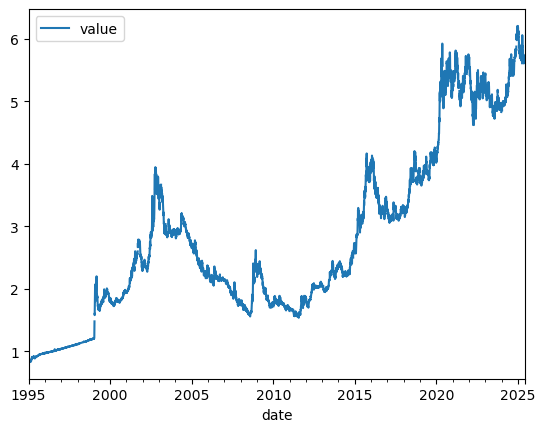

In [39]:
#now that the date is an index we can make the graph
df_dollar.plot()

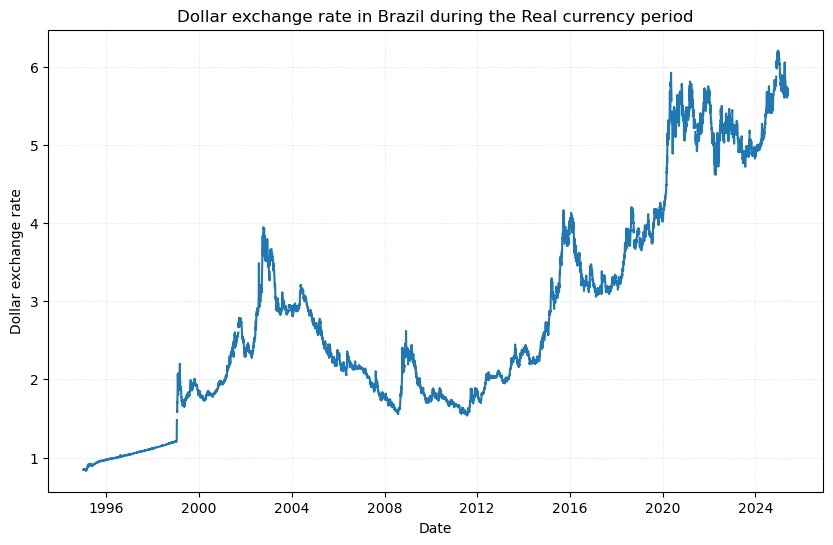

In [64]:
# creating a figure with matplotlib, setting the size
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# plotando o gráfico
ax.plot(df_dollar.index, df_dollar["value"])
ax.set_title("Dollar exchange rate in Brazil during the Real currency period")
ax.set_ylabel("Dollar exchange rate")
ax.set_xlabel("Date")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.1)

plt.show()

In [41]:
# getting the last date from the dataframe
ultima_data = df_dollar.index[-1]
ultima_data

Timestamp('2025-05-30 00:00:00')

In [42]:
# periods of presidents
presidentes = {
    "FHC": ("1995-01-01", "2002-12-31"),
    "Lula 1": ("2003-01-01", "2010-12-31"),
    "Dilma": ("2011-01-01", "2016-08-31"),
    "Temer": ("2016-09-01", "2018-12-31"),
    "Bolsonaro": ("2019-01-01", "2022-12-31"),
    "Lula 2": ("2023-01-01", "2025-05-30"),
}

In [44]:
# Matplotlib colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

#Matplotlib dates: https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.YearLocator

In [46]:
# colors are 8 tuples with 3 numbers to form RGB
cores = plt.cm.Pastel2.colors
cores

((0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9450980392156862, 0.8862745098039215, 0.8),
 (0.8, 0.8, 0.8))

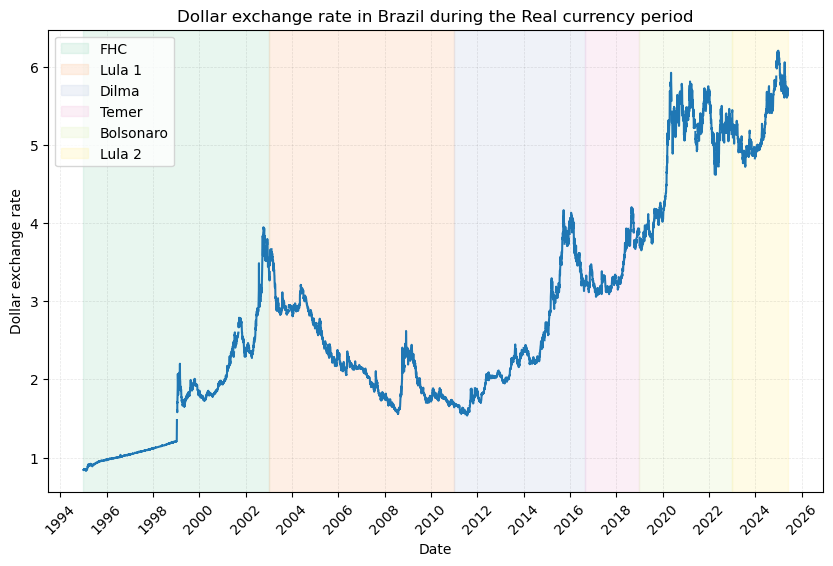

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))

# plotando o gráfico
ax.plot(df_dollar.index, df_dollar["value"])
ax.set_title("Dollar exchange rate in Brazil during the Real currency period")
ax.set_ylabel("Dollar exchange rate")
ax.set_xlabel("Date")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.1)

# pegando as cores da paleta Pastel2 do Matplotlib
cores = plt.cm.Pastel2.colors

#    ax.axvspan(presidentes["FHC"][0], presidentes["FHC"][1], color=cores[0], alpha=0.3, label=presidente)
        
# criando com vspan os retângulos para cada presidente
for presidente, periodo, cor in zip(presidentes.keys(), presidentes.values(), cores):
    ax.axvspan(
        periodo[0],
        periodo[1],
        color=cor,
        alpha=0.3,
        label=presidente,
    )
    
# colocando os anos de 2 em 2 no eixo x com o ticker do matplotlib
from matplotlib.dates import YearLocator

ax.xaxis.set_major_locator(YearLocator(2))

# rotacionando os ticks do eixo x
ax.xaxis.set_tick_params(rotation=45)
    
ax.legend()

plt.show()

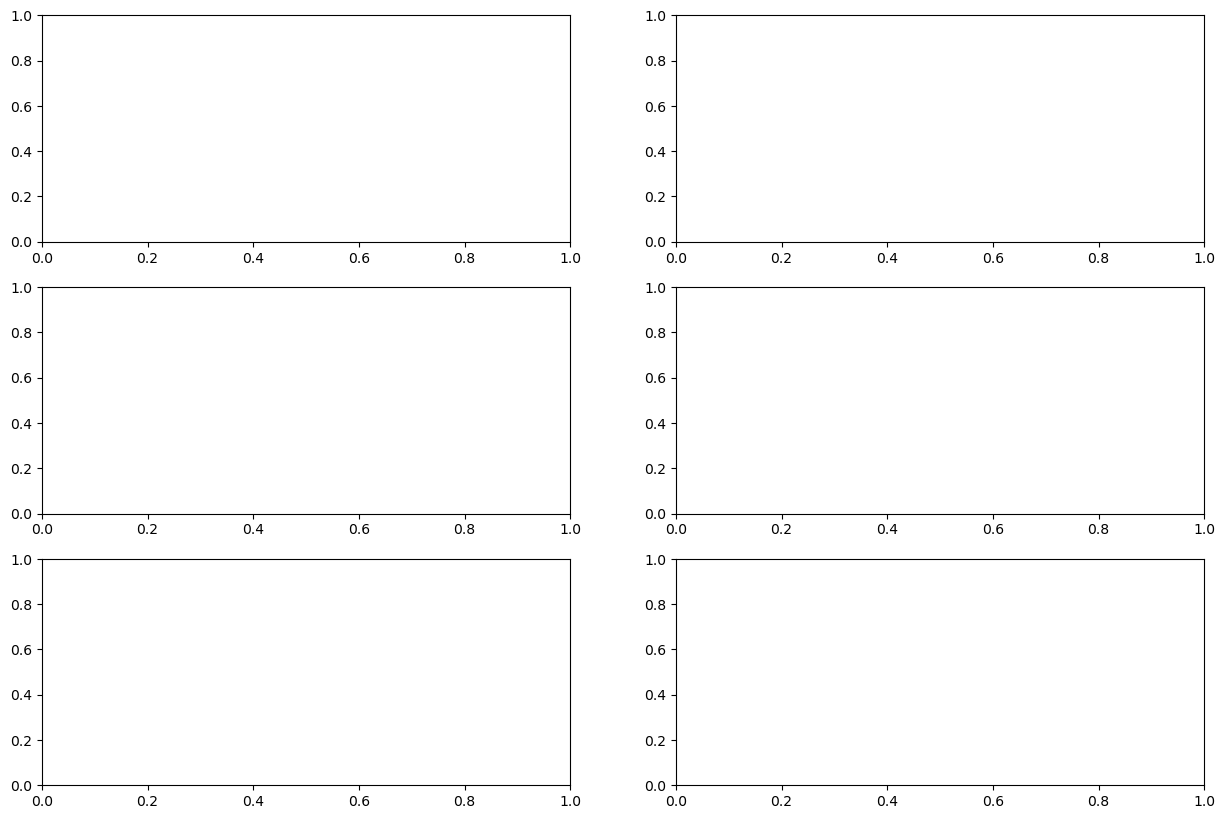

In [49]:
#understandig the coordinates system
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize=(15,10))

In [50]:
#checking the axis system of the graph matrix
axs


array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [54]:
#checking the axis system at coordinate 0
axs[0]

array([<Axes: >, <Axes: >], dtype=object)

In [55]:
#checking the axis system at coordinate 0,0
axs[0][0]

<Axes: >

In [51]:
#check axs type
type(axs)

numpy.ndarray

In [52]:
#to sequentially number the axis system by transforming a matrix with flatten
axs.flatten()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

In [53]:
df_dollar.loc[presidentes["FHC"][0]:presidentes["FHC"][1]]

,value
date,
1995-01-02,0.844
1995-01-03,0.845
1995-01-04,0.845
1995-01-05,0.843
1995-01-06,0.840
...,...
2002-12-25,NaN
2002-12-26,3.541
2002-12-27,3.554


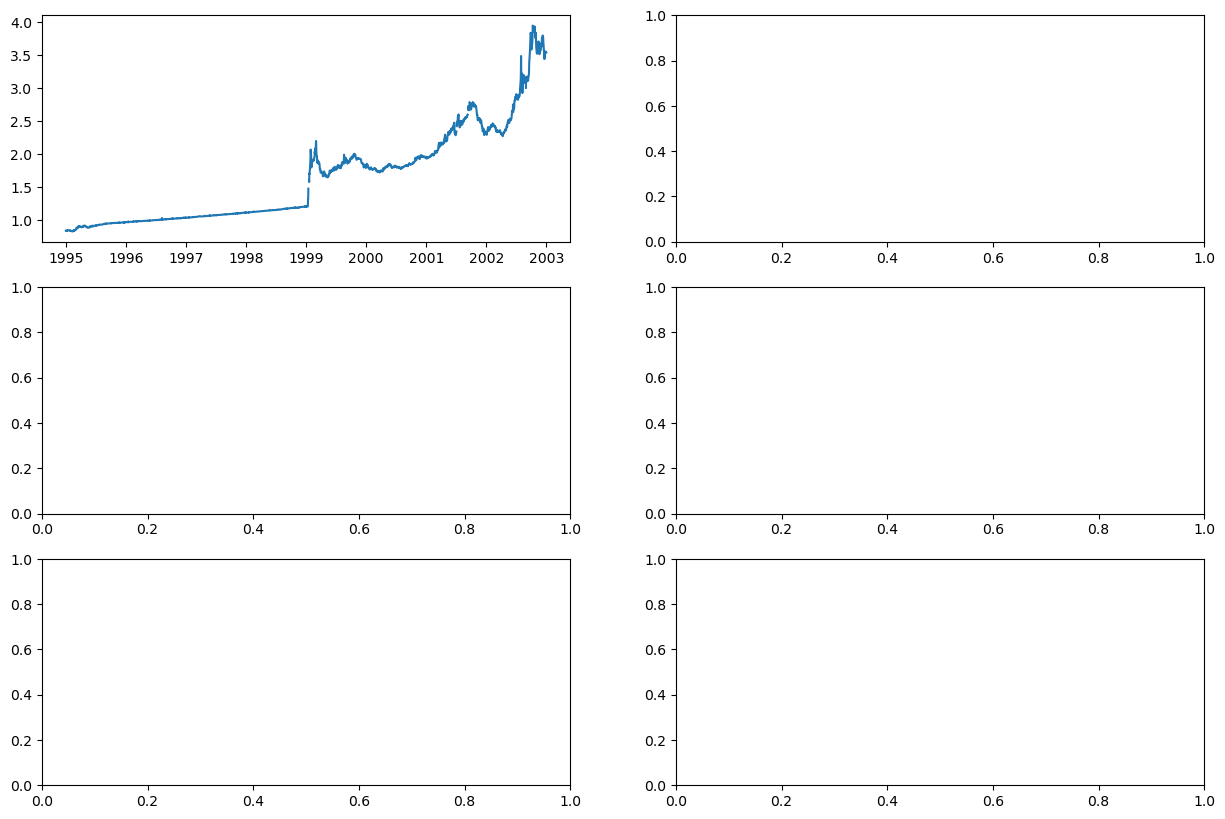

In [59]:
#understanding how to use axes coordinates
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize=(15,10))

axs[0,0].plot(df_dollar.loc[presidentes["FHC"][0]:presidentes["FHC"][1]].index, df_dollar.loc[presidentes["FHC"][0]:presidentes["FHC"][1]]["value"])

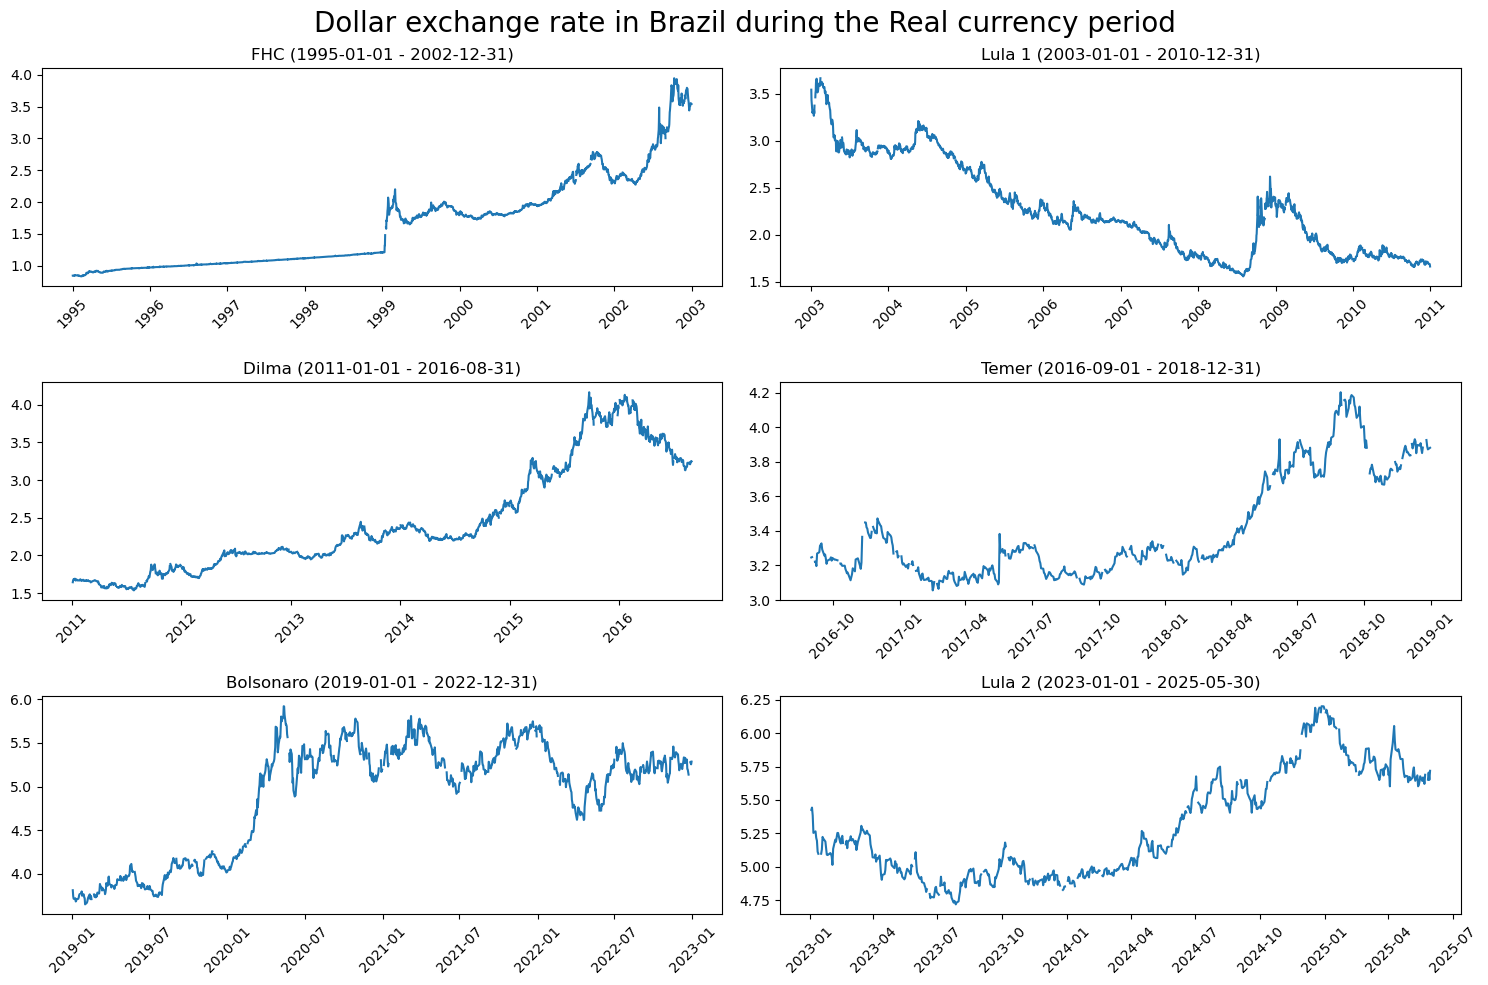

In [66]:
# creating a 3 x 2 grid of subplots, with one subplot for each president

#TIGHT makes matplot fit the plots without overlapping
fig, axs = plt.subplots(3, 2, figsize=(15, 10), tight_layout=True)

# iterating over the presidents and subplots
for presidente, periodo, ax in zip(presidentes.keys(), presidentes.values(), axs.flat):
    df_temp = df_dollar.loc[presidentes[presidente][0] : presidentes[presidente][1]]
    ax.plot(df_temp.index, df_temp["value"])
    
    # rotating the x-axis ticks
    ax.xaxis.set_tick_params(rotation=45)
    
    # putting the title of each subplot with the name of the president and the period
    ax.set_title(f"{presidente} ({periodo[0]} - {periodo[1]})")
    

fig.suptitle("Dollar exchange rate in Brazil during the Real currency period", fontsize=20)

plt.show()

## Objectives achieved:

-we saw how to consume the API<br>
-we understood the particularities of the API data in question. In this case, JSON for example<br>
-we protected the API key in an environment variable<br>
-we processed the data in different ways using Pandas: we passed the API data to a Pandas dataframe, transformed the data and data types, created an index<br>
-we transformed the x,y matrix into sequential coordinate systems<br>
-we created several graphs with Matplot<br>

